# MSA 2023 Phase 2 - Part 1

In [135]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\JackM\anaconda3\envs\datascienv\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: 


In [136]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

In [137]:
#Reading in CSV file
MarketData = pd.read_csv('market_segmentation.csv')

#printing first 10 records
MarketData.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [138]:
#Finding number of records in file
MarketData.shape

(8068, 11)

In [139]:
#Finding number of null values
MarketData.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [140]:
#finding gender split
NumMale = MarketData.Gender.value_counts().Male
ProportionMale = NumMale/MarketData.shape[0]

print("The proportion of males in the dataset is " + str(ProportionMale))


The proportion of males in the dataset is 0.5474714923153198


In [141]:
#Finding Mean and standard deviation of age
MeanAge = MarketData.Age.mean()
AgeStd = MarketData.Age.std()


print("Mean age is " + str(MeanAge) + "\nStandard deviation of age is " + str(AgeStd))

Mean age is 43.46690629647992
Standard deviation of age is 16.71169631872121


In [142]:
#finding proportion graduated
NumGrad = MarketData.Graduated.value_counts().Yes
ProportionGrad = NumGrad/MarketData.shape[0]

print("The proportion of graduates in the dataset is " + str(ProportionGrad))

The proportion of graduates in the dataset is 0.615765989092712


In [143]:
#finding professions
ProfCounts = MarketData.Profession.value_counts()
nullWorkers = MarketData.Profession.isnull().sum()


print(ProfCounts)
print("There are "+ str(nullWorkers) + " people where profession is null")


Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
There are 124 people where profession is null


In [144]:
#Finding Mean and standard deviation of age
MeanExperience = MarketData.Work_Experience.mean()
ExperienceStd = MarketData.Work_Experience.std()
nullExperience = MarketData.Work_Experience.isnull().sum()

print("Mean work experince is " + str(MeanExperience) + "\nStandard deviation of work experience is " + str(ExperienceStd))
print("There are "+ str(nullExperience) + " people where profession is null")

Mean work experince is 2.641663213150988
Standard deviation of work experience is 3.4067629854579518
There are 829 people where profession is null


In [145]:
SpendingCounts = MarketData.Spending_Score.value_counts()

print(SpendingCounts)

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64


In [146]:
MeanSize = MarketData.Family_Size.mean()
SizeStd = MarketData.Family_Size.std()
nullSize = MarketData.Family_Size.isnull().sum()

print("Mean family size is " + str(MeanSize) + "\nStandard deviation of family size is " + str(SizeStd))
print("There are "+ str(nullSize) + " people where family size is null")

Mean family size is 2.85012285012285
Standard deviation of family size is 1.5314132820253783
There are 335 people where family size is null


In [147]:
Var_1s = MarketData.Var_1.value_counts()

print(Var_1s)

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [148]:
Segments =  MarketData.Segmentation.value_counts()

print(Segments)

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64


In [149]:
#plotting box and whisker graphs for appropriate values
import graphing


graphing.box_and_whisker(MarketData, label_x="Segmentation", label_y="Age", show=True)

graphing.box_and_whisker(MarketData, label_x="Segmentation", label_y="Work_Experience", show=True)

graphing.box_and_whisker(MarketData, label_x="Segmentation", label_y="Family_Size")




These show weak correlation, but in some parts it is stronger than others, for example average age is strongly correlated, with D being youngest, then A then B then C. Has a similar, but weaker and inverse correlation, with D tending to have the most work experience, and the same order through C having the least work experience. Family size has less of a broad trend, but A is correlated strongly with smaller families than the other segments

## 2. Clean data

In [150]:
#the datapoints with the most null values are work experience and family size
#these may be possible to replace with average, but that 
#MarketData["Family_Size"] = MarketData["Family_Size"].fillna(MeanSize)
#MarketData["Work_Experience"] = MarketData["Work_Experience"].fillna(MeanExperience)
MarketData.isnull().sum()



ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [151]:
#Removing null values 
MarketData = MarketData.dropna()
MarketData.shape

#saving a copy of the dataframe before converting values to onehot to make plotting heatmaps easier
MarketDataPre = MarketData

In [152]:
#converting professions to onehot then dropping and checking  
MarketDataOneHot = pd.get_dummies(MarketData, columns=["Profession"], drop_first=False)
MarketDataOneHot["Profession"] = MarketData.Profession

MarketDataOneHot = MarketDataOneHot.drop('Profession', axis=1)
MarketData = MarketDataOneHot
MarketData.head()


,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,462809,Male,No,22,No,1.0,Low,4.0,Cat_4,D,0,0,0,0,0,1,0,0,0
2,466315,Female,Yes,67,Yes,1.0,Low,1.0,Cat_6,B,0,0,1,0,0,0,0,0,0
3,461735,Male,Yes,67,Yes,0.0,High,2.0,Cat_6,B,0,0,0,0,0,0,0,1,0
5,461319,Male,Yes,56,No,0.0,Average,2.0,Cat_6,C,1,0,0,0,0,0,0,0,0
6,460156,Male,No,32,Yes,1.0,Low,3.0,Cat_6,C,0,0,0,0,0,1,0,0,0


In [153]:
#repeating, but for "Var_1"
MarketDataOneHot = pd.get_dummies(MarketData, columns=["Var_1"], drop_first=False)
MarketDataOneHot["Var_1"] =MarketData.Var_1

MarketDataOneHot = MarketDataOneHot.drop('Var_1', axis=1)
MarketData = MarketDataOneHot
MarketData.head()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,Male,No,22,No,1.0,Low,4.0,D,0,...,0,0,0,0,0,0,1,0,0,0
2,466315,Female,Yes,67,Yes,1.0,Low,1.0,B,0,...,0,0,0,0,0,0,0,0,1,0
3,461735,Male,Yes,67,Yes,0.0,High,2.0,B,0,...,0,1,0,0,0,0,0,0,1,0
5,461319,Male,Yes,56,No,0.0,Average,2.0,C,1,...,0,0,0,0,0,0,0,0,1,0
6,460156,Male,No,32,Yes,1.0,Low,3.0,C,0,...,0,0,0,0,0,0,0,0,1,0


In [154]:
#removing ID, unique so will not be useful for classification model
MarketData = MarketData.drop('ID', axis=1)
MarketData.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,Male,No,22,No,1.0,Low,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Female,Yes,67,Yes,1.0,Low,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Male,Yes,67,Yes,0.0,High,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,Male,Yes,56,No,0.0,Average,2.0,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,Male,No,32,Yes,1.0,Low,3.0,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [155]:
#Converting "Gender" to bool
MarketData = MarketData.replace(to_replace="Male", value=1)
MarketData = MarketData.replace(to_replace="Female", value=0)

MarketData = MarketData.rename(columns={"Gender":"Is_Male"})


MarketData.head()


,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,No,22,No,1.0,Low,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,Yes,67,Yes,1.0,Low,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,Yes,67,Yes,0.0,High,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,Yes,56,No,0.0,Average,2.0,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,No,32,Yes,1.0,Low,3.0,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [156]:
#Same for ever married
MarketData = MarketData.replace(to_replace="Yes", value=1)
MarketData = MarketData.replace(to_replace="No", value=0)

MarketData.head()


,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.0,Low,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,Low,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,67,1,0.0,High,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,1,56,0,0.0,Average,2.0,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,32,1,1.0,Low,3.0,C,0,0,...,0,0,0,0,0,0,0,0,1,0


In [157]:
#For spending score, it has more than two value, but they are ordered so we can convert it to sequential data 
MarketData = MarketData.replace(to_replace="Low", value=1)
MarketData = MarketData.replace(to_replace="Average", value=2)
MarketData = MarketData.replace(to_replace="High", value=3)

MarketData.head()

,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.0,1,4.0,D,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,1,1.0,B,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,67,1,0.0,3,2.0,B,0,0,...,0,1,0,0,0,0,0,0,1,0
5,1,1,56,0,0.0,2,2.0,C,1,0,...,0,0,0,0,0,0,0,0,1,0
6,1,0,32,1,1.0,1,3.0,C,0,0,...,0,0,0,0,0,0,0,0,1,0


Now all are data is numerical/boolean, and while this does make it more difficult to read, it means ml models will have a much easier time learning correlations


## 3. Visualise data

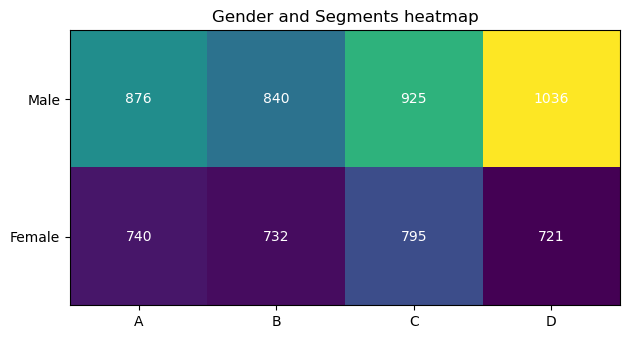

In [158]:
MaleMarketData = MarketData[ MarketData["Is_Male"] == 1]
FemaleMarketData = MarketData[ MarketData["Is_Male"] == 0]

SegmentsMale =  MaleMarketData.Segmentation.value_counts()
SegmentsFemale =  FemaleMarketData.Segmentation.value_counts()


SegmentsMale = [SegmentsMale['A'], SegmentsMale['B'], SegmentsMale['C'], SegmentsMale['D']]
SegmentsFemale = [SegmentsFemale['A'], SegmentsFemale['B'], SegmentsFemale['C'], SegmentsFemale['D']]

Segments = [SegmentsMale, SegmentsFemale]


Gender = ['Male', 'Female']
Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Segments)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Gender)), labels=Gender)


# Loop over data dimensions and create text annotations.
for i in range(len(Gender)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Segments[i][j],ha="center", va="center", color="w")

ax.set_title("Gender and Segments heatmap")
fig.tight_layout()
plt.show()

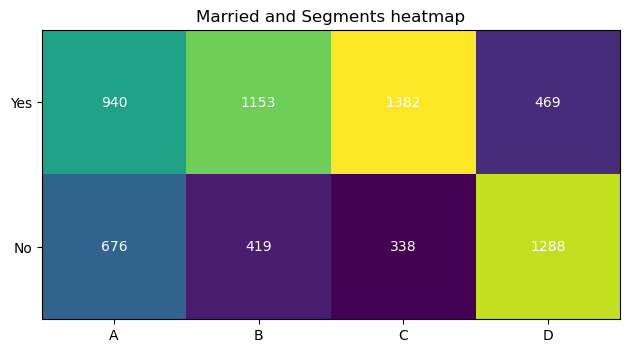

In [167]:
MarriedMarketData = MarketData[ MarketData["Ever_Married"] == 1]
UnMarriedMarketData = MarketData[ MarketData["Ever_Married"] == 0]

SegmentsMarried =  MarriedMarketData.Segmentation.value_counts()
SegmentsUnMarried =  UnMarriedMarketData.Segmentation.value_counts()


SegmentsMarried = [SegmentsMarried['A'], SegmentsMarried['B'], SegmentsMarried['C'], SegmentsMarried['D']]
SegmentsUnMarried = [SegmentsUnMarried['A'], SegmentsUnMarried['B'], SegmentsUnMarried['C'], SegmentsUnMarried['D']]

Segments = [SegmentsMarried, SegmentsUnMarried]


Married = ['Yes', 'No']
Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Segments)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Married)), labels=Married)


# Loop over data dimensions and create text annotations.
for i in range(len(Married)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Segments[i][j],ha="center", va="center", color="w")

ax.set_title("Married and Segments heatmap")
fig.tight_layout()
plt.show()

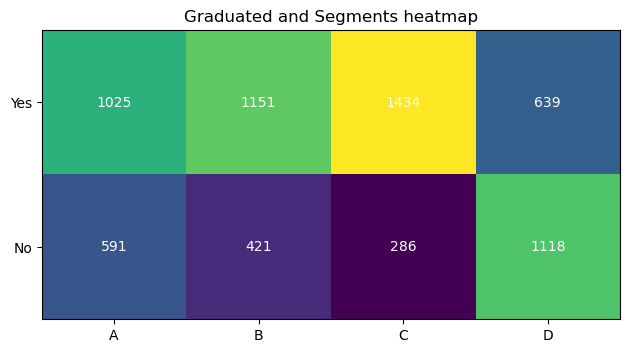

In [168]:
GraduatedMarketData = MarketData[ MarketData["Graduated"] == 1]
NotGraduatedMarketData = MarketData[ MarketData["Graduated"] == 0]

SegmentsGraduated =  GraduatedMarketData.Segmentation.value_counts()
SegmentsNotGraduated =  NotGraduatedMarketData.Segmentation.value_counts()


SegmentsGraduated = [SegmentsGraduated['A'], SegmentsGraduated['B'], SegmentsGraduated['C'], SegmentsGraduated['D']]
SegmentsNotGraduated = [SegmentsNotGraduated['A'], SegmentsNotGraduated['B'], SegmentsNotGraduated['C'], SegmentsNotGraduated['D']]

Segments = [SegmentsGraduated, SegmentsNotGraduated]


Graduated = ['Yes', 'No']
Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Segments)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Graduated)), labels=Graduated)


# Loop over data dimensions and create text annotations.
for i in range(len(Graduated)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Segments[i][j],ha="center", va="center", color="w")

ax.set_title("Graduated and Segments heatmap")
fig.tight_layout()
plt.show()

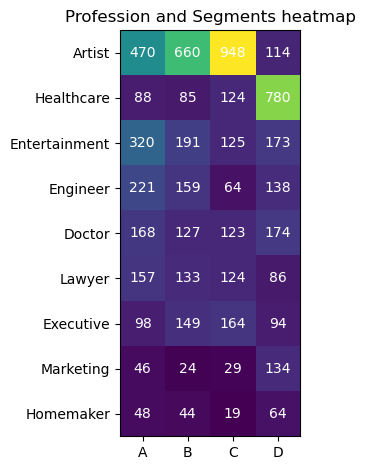

In [162]:
Professions = ['Artist','Healthcare','Entertainment','Engineer','Doctor','Lawyer','Executive','Marketing','Homemaker']
Counts = []

for i in Professions:
    tempstring = "Profession_" + i
    tempdf = MarketData[MarketData[tempstring] == 1]
    SegmentTemp = tempdf.Segmentation.value_counts()
    temp = [SegmentTemp['A'], SegmentTemp['B'], SegmentTemp['C'], SegmentTemp['D']]
    Counts.append(temp)

Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Counts)

#Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Professions)), labels=Professions)


# Loop over data dimensions and create text annotations.
for i in range(len(Professions)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Counts[i][j],ha="center", va="center", color="w")

ax.set_title("Profession and Segments heatmap")
fig.tight_layout()
plt.show()

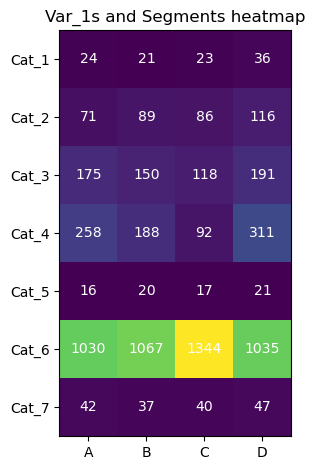

In [164]:
Var_1s = ['Cat_1','Cat_2','Cat_3','Cat_4','Cat_5','Cat_6','Cat_7']
Counts = []

for i in Var_1s:
    tempstring = "Var_1_" + i
    tempdf = MarketData[MarketData[tempstring] == 1]
    SegmentTemp = tempdf.Segmentation.value_counts()
    temp = [SegmentTemp['A'], SegmentTemp['B'], SegmentTemp['C'], SegmentTemp['D']]
    Counts.append(temp)

Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Counts)

#Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Var_1s)), labels=Var_1s)


# Loop over data dimensions and create text annotations.
for i in range(len(Var_1s)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Counts[i][j],ha="center", va="center", color="w")

ax.set_title("Var_1s and Segments heatmap")
fig.tight_layout()
plt.show()

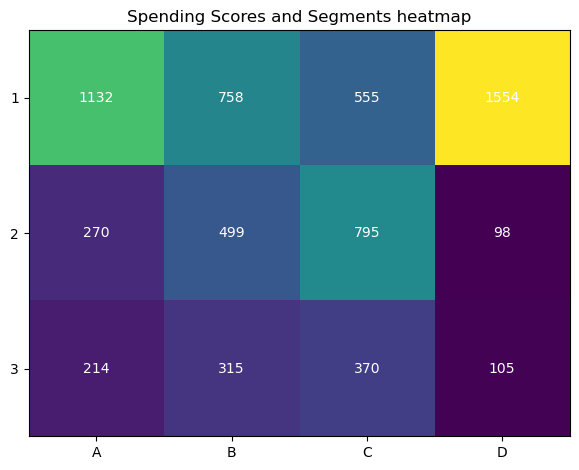

In [166]:
SpendingScores = [1,2,3]
Counts = []

for i in SpendingScores:
    tempdf = MarketData[MarketData["Spending_Score"] == i]
    SegmentTemp = tempdf.Segmentation.value_counts()
    temp = [SegmentTemp['A'], SegmentTemp['B'], SegmentTemp['C'], SegmentTemp['D']]
    Counts.append(temp)

Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(Counts)

#Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(SpendingScores)), labels=SpendingScores)


# Loop over data dimensions and create text annotations.
for i in range(len(SpendingScores)):
    for j in range(len(Segment)):
        text = ax.text(j, i, Counts[i][j],ha="center", va="center", color="w")

ax.set_title("Spending Scores and Segments heatmap")
fig.tight_layout()
plt.show()

## 4. Identify correlated variables

C:\Users\JackM\AppData\Local\Temp\ipykernel_12488\4209392616.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

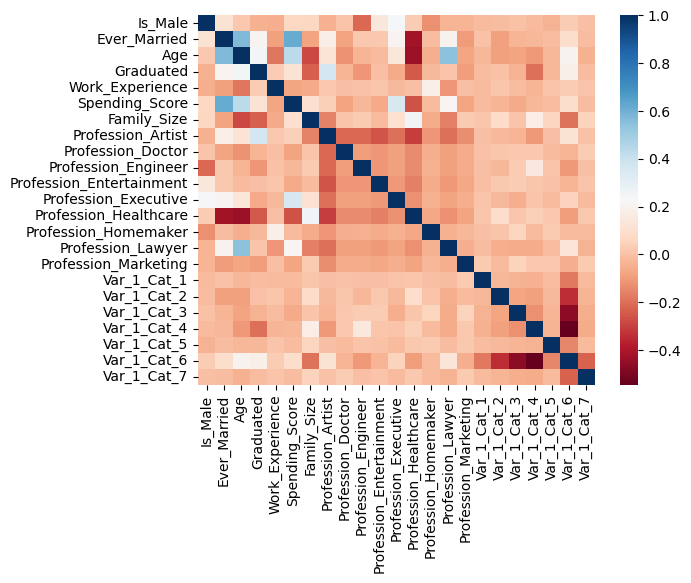

In [189]:
corr = MarketData.corr()

sns.heatmap(corr, cmap='RdBu')

C:\Users\JackM\AppData\Local\Temp\ipykernel_12488\1671487117.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

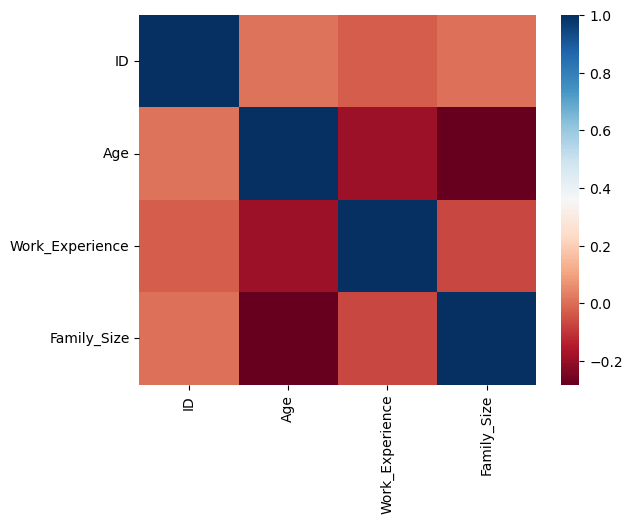

In [190]:
corr2 = MarketDataPre.corr()

sns.heatmap(corr2, cmap='RdBu')

## 5. Summary